***
### Create Connectivity Matrices with netcc for all subjects

In [44]:
from utils.basics import PNAS2015_folder, PNAS2015_subject_list
import subprocess
import os.path as osp
import os

In [45]:
target_folder = '/data/SFIMJGC_HCP7T/manifold_learning_fmri/Data/PNAS2015/'

In [46]:
for sbj in PNAS2015_subject_list:
    target_folder_sbj = osp.join(target_folder,sbj)
    if not osp.exists(target_folder_sbj):
        os.makedirs(target_folder_sbj)

In [54]:
for sbj in PNAS2015_subject_list:
    target_folder_sbj = osp.join(target_folder,sbj)
    command = """module load afni; \
                 cd {target_folder_sbj}; \
                 3dcalc -overwrite -datum short -a {PNAS2015_folder}/PrcsData/{sbj}/D02_CTask001/{sbj}_CTask001.Craddock_T2Level_0200.lowSigma+orig.HEAD -expr 'a*(l+1)' -prefix {sbj}_Craddock_0200; \
                 3dTstat -overwrite -max -prefix {sbj}_Craddock_0200 {sbj}_Craddock_0200+orig; \
                 echo "++ INFO: Creating TS and FC for less restrictive filtering [0.006 - 0.18 Hz]"; \
                 3dNetCorr -overwrite -ts_out -in_rois {sbj}_Craddock_0200+orig -mask  {PNAS2015_folder}/PrcsData/{sbj}/D02_CTask001/pb06.{sbj}_CTask001.bpf.WL180.mask.lowSigma+orig.HEAD -inset {PNAS2015_folder}/PrcsData/{sbj}/D02_CTask001/pb08.{sbj}_CTask001.blur.WL180+orig.HEAD -prefix {sbj}_Craddock_0200.WL180s; \
                 echo "++ INFO: Creating TS and FC for tvFC with 45s windows [0.023 - 0.18 Hz]"; \
                 3dNetCorr -overwrite -ts_out -in_rois {sbj}_Craddock_0200+orig -mask  {PNAS2015_folder}/PrcsData/{sbj}/D02_CTask001/pb06.{sbj}_CTask001.bpf.WL045.mask.lowSigma+orig.HEAD -inset {PNAS2015_folder}/PrcsData/{sbj}/D02_CTask001/pb08.{sbj}_CTask001.blur.WL045+orig.HEAD -prefix {sbj}_Craddock_0200.WL045s; \
                 echo "++ INFO: Creating TS and FC for tvFC with 30s windows [0.034 - 0.18 Hz]"; \
                 3dNetCorr -overwrite -ts_out -in_rois {sbj}_Craddock_0200+orig -mask  {PNAS2015_folder}/PrcsData/{sbj}/D02_CTask001/pb06.{sbj}_CTask001.bpf.WL030.mask.lowSigma+orig.HEAD -inset {PNAS2015_folder}/PrcsData/{sbj}/D02_CTask001/pb08.{sbj}_CTask001.blur.WL030+orig.HEAD -prefix {sbj}_Craddock_0200.WL030s; \
                 """.format(target_folder_sbj=target_folder_sbj,
                         PNAS2015_folder=PNAS2015_folder,
                         sbj=sbj)
    output  = subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
    print(output.strip().decode())
    print('++ ========================================================================================= ++')

[+] Loading AFNI current-openmp  ... 
AFNI/current-openmp last updated  2022-08-23

++ 3dcalc: AFNI version=AFNI_22.2.07 (Aug 19 2022) [64-bit]
++ Authored by: A cast of thousands
++ Symbol l using predefined value
++ Output dataset ./SBJ06_Craddock_0200+orig.BRIK
++ 3dTstat: AFNI version=AFNI_22.2.07 (Aug 19 2022) [64-bit]
++ Authored by: KR Hammett & RW Cox
*+ WARNING: Input dataset is not 3D+time; assuming TR=1.0
++ Output dataset ./SBJ06_Craddock_0200+orig.BRIK
++ INFO: Creating TS and FC for less restrictive filtering [0.006 - 0.18 Hz]
++ Reading in.
++ Allocating...
++ Applying user's mask
++ Applying mask to ROIs.
++ Labelling regions internally.
++ No refset labeltable for naming things.
++ Getting volumes.
++ Calculating average time series.
++ Calculating correlation matrix.
++ Writing output: SBJ06_Craddock_0200.WL180s ...
++ INFO: Creating TS and FC for tvFC with 45s windows [0.023 - 0.18 Hz]
++ Reading in.
++ Allocating...
++ Applying user's mask
++ Applying mask to ROIs.


***
### Sort ROIs by Network

1. Download the Yeo Atlas from: ftp://surfer.nmr.mgh.harvard.edu/pub/data/Yeo_JNeurophysiol11_MNI152.zip

2. Separate into the different networks

```bash
cd /data/SFIMJGC_HCP7T/manifold_learning_fmri/Data/Yeo_JNeurophysiol11_MNI152
3dcalc -a Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz -expr 'equals(a,1)' -prefix Yeo2011_7Networks_01_Visual.nii
3dcalc -a Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz -expr 'equals(a,2)' -prefix Yeo2011_7Networks_02_SomatoMotor.nii
3dcalc -a Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz -expr 'equals(a,3)' -prefix Yeo2011_7Networks_03_DorsalAttention.nii
3dcalc -a Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz -expr 'equals(a,4)' -prefix Yeo2011_7Networks_04_VentralAttention.nii
3dcalc -a Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz -expr 'equals(a,5)' -prefix Yeo2011_7Networks_05_Limbic.nii
3dcalc -a Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz -expr 'equals(a,6)' -prefix Yeo2011_7Networks_06_Control.nii
3dcalc -a Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz -expr 'equals(a,7)' -prefix Yeo2011_7Networks_07_DMN.nii
```

Now for each subject


3. Bring Networks into the same grid as the subject data
```bash
cd /data/SFIMJGC_HCP7T/manifold_learning_fmri/Data/PNAS2015/SBJ06
3dAllineate -1Dmatrix_apply /data/SFIMJGC/PRJ_CognitiveStateDetection01/PrcsData/SBJ06/D02_CTask001/SBJ06_CTask001.MNI2REF.Xaff12.1D -input ../../Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_01_Visual.nii -master SBJ06_Craddock_0200+orig. -final NN -prefix SBJ06.Yeo2011_7Networks_01_Visual
3dAllineate -1Dmatrix_apply /data/SFIMJGC/PRJ_CognitiveStateDetection01/PrcsData/SBJ06/D02_CTask001/SBJ06_CTask001.MNI2REF.Xaff12.1D -input ../../Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_02_SomatoMotor.nii -master SBJ06_Craddock_0200+orig. -final NN -prefix SBJ06.Yeo2011_7Networks_02_SomatoMotor
3dAllineate -1Dmatrix_apply /data/SFIMJGC/PRJ_CognitiveStateDetection01/PrcsData/SBJ06/D02_CTask001/SBJ06_CTask001.MNI2REF.Xaff12.1D -input ../../Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_03_DorsalAttention.nii -master SBJ06_Craddock_0200+orig. -final NN -prefix SBJ06.Yeo2011_7Networks_03_DorsalAttention
3dAllineate -1Dmatrix_apply /data/SFIMJGC/PRJ_CognitiveStateDetection01/PrcsData/SBJ06/D02_CTask001/SBJ06_CTask001.MNI2REF.Xaff12.1D -input ../../Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_04_VentralAttention.nii -master SBJ06_Craddock_0200+orig. -final NN -prefix SBJ06.Yeo2011_7Networks_04_VentralAttention
3dAllineate -1Dmatrix_apply /data/SFIMJGC/PRJ_CognitiveStateDetection01/PrcsData/SBJ06/D02_CTask001/SBJ06_CTask001.MNI2REF.Xaff12.1D -input ../../Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_05_Limbic.nii -master SBJ06_Craddock_0200+orig. -final NN -prefix SBJ06.Yeo2011_7Networks_05_Limbic
3dAllineate -1Dmatrix_apply /data/SFIMJGC/PRJ_CognitiveStateDetection01/PrcsData/SBJ06/D02_CTask001/SBJ06_CTask001.MNI2REF.Xaff12.1D -input ../../Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_06_Control.nii -master SBJ06_Craddock_0200+orig. -final NN -prefix SBJ06.Yeo2011_7Networks_06_Control
3dAllineate -1Dmatrix_apply /data/SFIMJGC/PRJ_CognitiveStateDetection01/PrcsData/SBJ06/D02_CTask001/SBJ06_CTask001.MNI2REF.Xaff12.1D -input ../../Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_07_DMN.nii -master SBJ06_Craddock_0200+orig. -final NN -prefix SBJ06.Yeo2011_7Networks_07_DMN
```

3. Run the script that computes the overlap between each Craddock ROI and each Yeo Network

```bash
sh ./N00_Preparations_ComputeOveral_Craddock_Yeo.sh
```

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import Bunch
from nilearn.connectome import vec_to_sym_matrix
from utils.fc import load_netcc

In [58]:
overlap            = pd.read_csv('/data/SFIMJGC_HCP7T/manifold_learning_fmri/Data/PNAS2015/SBJ06/SBJ06.Craddock2Yeo_Overlap.csv', index_col=[0])
overlap.head(5)

,Num_Voxels,01_Visual,02_SomatoMotor,03_DorsalAttention,04_VentralAttention,05_Limbic,06_Control,07_DMN,08_Subcortical
ROI_Number,,,,,,,,,
1,282,263,0,0,0,0,0,0,19
2,465,1,0,52,30,0,0,379,3
3,530,252,0,0,0,0,48,196,34
4,462,0,90,0,158,0,0,6,208
5,405,0,0,0,0,0,0,381,24


In [59]:
overlap['Network'] = [overlap.drop('Num_Voxels',axis=1).columns[overlap.drop('Num_Voxels',axis=1).loc[i].argmax()] for i in overlap.index]
overlap.sort_values(by='Network')

,Num_Voxels,01_Visual,02_SomatoMotor,03_DorsalAttention,04_VentralAttention,05_Limbic,06_Control,07_DMN,08_Subcortical,Network
ROI_Number,,,,,,,,,,
1,282,263,0,0,0,0,0,0,19,01_Visual
67,669,574,0,0,0,0,0,0,95,01_Visual
78,330,320,0,0,0,0,0,0,8,01_Visual
80,572,443,0,0,0,0,0,26,103,01_Visual
83,398,365,0,0,0,0,0,0,33,01_Visual
...,...,...,...,...,...,...,...,...,...,...
112,332,0,0,0,0,0,0,0,332,08_Subcortical
15,402,0,0,0,0,0,0,0,402,08_Subcortical
116,718,13,0,0,0,0,0,0,439,08_Subcortical


In [60]:
sorted_idxs = list(np.array(overlap.sort_values(by='Network').index) - 1)
sorted_rois = [ 'ROI{r}'.format(r=str(i).zfill(3)) for i in sorted_idxs]

In [76]:
ROI_Sorting_Path = '/data/SFIMJGC_HCP7T/manifold_learning_fmri/Data/PNAS2015/Other/Craddock_0200_SortByYeo7Networks.txt'

In [80]:
ROI_Sorting = pd.Series(sorted_rois)
ROI_Sorting.index.name = 'ROI_ID'
ROI_Sorting.name = 'ROI_Name'
ROI_Sorting.to_csv(ROI_Sorting_Path)

***
### Sanity Check #1 - Time series from MATLAB code (PNAS2015)

In [61]:
roi_ts = pd.read_csv('/data/SFIMJGC_HCP7T/manifold_learning_fmri/Resources/Figure01/sbj06_ctask001_nroi0200_wl030_ws001.csv', index_col=[0])

<AxesSubplot:>

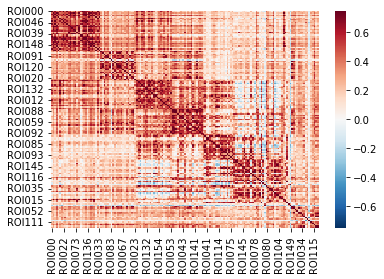

In [62]:
sns.heatmap(roi_ts[sorted_rois].corr(), cmap='RdBu_r', vmin=-.75, vmax=.75)

***
### Sanity Check #2 - tvFC matrix from MATLAB Code (PNAS2015)

In [63]:
print('++ INFO: Loading the tvFC dataset.....')
X_df = pd.read_csv('../Resources/Figure03/swcZ_sbj06_ctask001_nroi0200_wl030_ws001.csv.gz', index_col=[0,1])
# Becuase pandas does not like duplicate column names, it automatically adds .1, .2, etc to the names. We delete those next
X_df.columns = X_df.columns.str.split('.').str[0]

++ INFO: Loading the tvFC dataset.....


In [64]:
# Extract Task Lbaels (for coloring purposes)
labels             = pd.Series(X_df.columns)
X                  = X_df.values.T
X_orig             = X.copy()
(n_wins, n_conns)  = X.shape         # n = number of samples | d = original number of dimensions
print(' +       Input data shape = [%d Windows X %d Connections]' % (n_wins, n_conns))

 +       Input data shape = [988 Windows X 12246 Connections]


In [65]:
# Replace zeros by a very small number to avoid division by zero errors
X[X==0] = 1e-12

In [66]:
# Convert to a sklearn.Bunch object
tvFC        = Bunch()
tvFC.data   = X
tvFC.labels = labels

In [67]:
# Plot the FC for one window as a sanity check
avg_matrix = vec_to_sym_matrix(X.mean(axis=0), diagonal=np.ones(157)/np.sqrt(2))

In [68]:
avg_matrix = pd.DataFrame(avg_matrix, 
                          index=['ROI{r}'.format(r=str(i).zfill(3)) for i in np.arange(157)],
                          columns = ['ROI{r}'.format(r=str(i).zfill(3)) for i in np.arange(157)])

<AxesSubplot:>

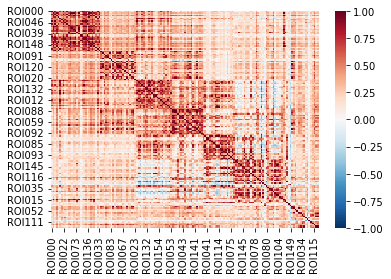

In [69]:
sns.heatmap(avg_matrix.loc[sorted_rois,sorted_rois], cmap='RdBu_r',vmin=-1, vmax=1)

***
### Sanity Check #3 - 3dNetCorr

In [74]:
netcc_path = '/data/SFIMJGC_HCP7T/manifold_learning_fmri/Data/PNAS2015/SBJ06/SBJ06_Craddock_0200.WL180s_000.netcc'
sfc = load_netcc(netcc_path, roi_names=['ROI{r}'.format(r=str(i).zfill(3)) for i in np.arange(157)])

<AxesSubplot:>

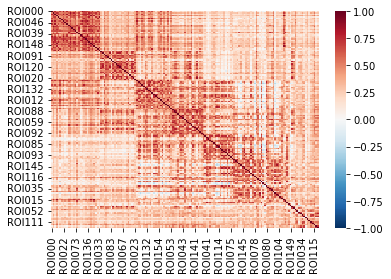

In [75]:
sns.heatmap(sfc.loc[sorted_rois,sorted_rois], cmap='RdBu_r',vmin=-1, vmax=1)